<a href="https://colab.research.google.com/github/mmgyorke/image_processing_opencv/blob/main/image_processing_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Image processing using OpenCV in Google Colab**

**Purpose:** The purpose of this notebook is to process images in OpenCV. OpenCV operates a bit differently in Colab, so I wanted to put my coding process forward.

**Methods:** The three methods being used are the blur operation (*Gaussian smoothing*), an edge detection kernel (*Laplacian operator*), and the sharpen operation. 

**Use cases:** The blur method reduces noise and averages out rapid changes in pixel intensity. Edge detection determines the image gradient and helps us identify relevant features. This process is useful in self-driving vehicles. Sharpening defines the edges of an image, and is often employed in facial recognition applications. 

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving telephone.jpeg to telephone.jpeg
User uploaded file "telephone.jpeg" with length 15568 bytes


In [ ]:
import os
!ls
os.getcwd()

sample_data  telephone.jpeg


'/content'

['.config', 'telephone.jpeg', 'sample_data']
telephone.jpeg
/content/telephone.jpeg


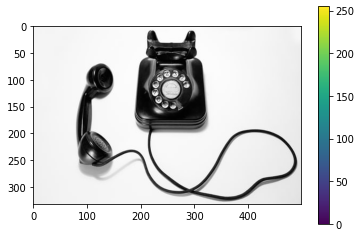

In [ ]:
items = os.listdir('/content')
print (items)    

for each_image in items:
  if each_image.endswith(".jpeg"):
    print (each_image)
    full_path = "/content/" + each_image
    print (full_path)
    image = cv2.imread(full_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)

In [ ]:
print(image)

[[[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [245 245 245]
  [245 245 245]
  [245 245 245]]

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [245 245 245]
  [245 245 245]
  [245 245 245]]

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [245 245 245]
  [245 245 245]
  [245 245 245]]

 ...

 [[235 235 235]
  [235 235 235]
  [236 236 236]
  ...
  [224 224 224]
  [223 223 223]
  [222 222 222]]

 [[235 235 235]
  [235 235 235]
  [236 236 236]
  ...
  [223 223 223]
  [222 222 222]
  [221 221 221]]

 [[235 235 235]
  [235 235 235]
  [235 235 235]
  ...
  [223 223 223]
  [222 222 222]
  [221 221 221]]]


In [ ]:
print(image.shape)

(333, 500, 3)


In [ ]:
!rm telephone.jpeg

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving city cars.jpeg to city cars (1).jpeg
User uploaded file "city cars.jpeg" with length 44260 bytes


In [ ]:
import os
!ls
os.getcwd()

'city cars (1).jpeg'  'city cars.jpeg'	 sample_data


'/content'

['.config', 'city cars (1).jpeg', 'city cars.jpeg', 'sample_data']
city cars (1).jpeg
/content/city cars (1).jpeg
city cars.jpeg
/content/city cars.jpeg


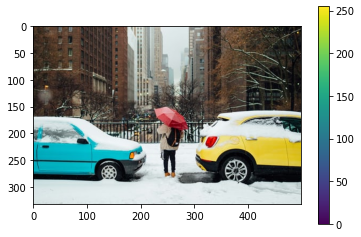

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
items = os.listdir('/content')
print (items)    

for each_image in items:
  if each_image.endswith(".jpeg"):
    print (each_image)
    full_path = "/content/" + each_image
    print (full_path)
    image = cv2.imread(full_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)

In [ ]:
print(image)

[[[ 75  63  49]
  [ 74  61  45]
  [ 73  57  42]
  ...
  [ 13  14  16]
  [ 17  18  20]
  [ 19  20  22]]

 [[ 64  52  38]
  [ 62  50  34]
  [ 64  48  32]
  ...
  [ 11  12  14]
  [ 15  15  17]
  [ 17  18  20]]

 [[ 59  50  35]
  [ 61  49  33]
  [ 65  49  33]
  ...
  [  8   7  12]
  [ 11   9  14]
  [ 13  12  17]]

 ...

 [[218 230 230]
  [215 227 227]
  [213 225 225]
  ...
  [215 227 227]
  [215 227 227]
  [214 226 226]]

 [[216 228 228]
  [214 226 226]
  [211 223 223]
  ...
  [215 227 227]
  [215 227 227]
  [215 227 227]]

 [[214 226 226]
  [212 224 224]
  [209 221 221]
  ...
  [216 228 228]
  [216 228 228]
  [216 228 228]]]


In [ ]:
print(image.shape)

(333, 500, 3)


In [ ]:
print(np.amax(image))

255


In [ ]:
print(np.amin(image))

0


In [ ]:
# IMAGE PROCESSING - BLUR OPERATION

In [ ]:
# creating the blur kernel
kernel = np.ones((5,5)) / 25

In [ ]:
print(kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


In [ ]:
# -1 makes sure the original image depth is same as blurred image depth
blur_image = cv2.filter2D(image, -1, kernel)

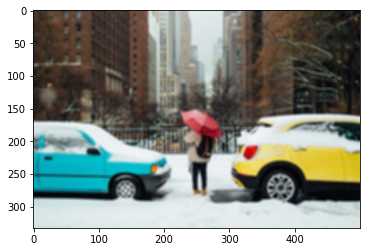

In [ ]:
plt.imshow(blur_image)

In [ ]:
# gaussian blur is used to reduce noise

In [ ]:
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# IMAGE PROCESSING - EDGE DETECTION
# determines the image gradient to highlight regions with high spatial derivatives
# gives us relevant features

In [ ]:
# transform into grayscale
# openCV handles BGR instead of RGB
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

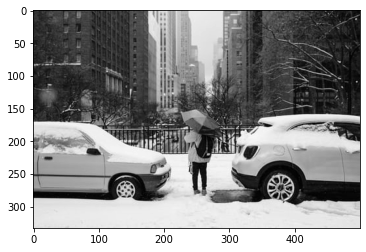

In [ ]:
plt.imshow(gray_image, cmap = "gray")

In [ ]:
# the Laplacian operator (3x3 matrix, cast as an array)
kernel = np.array([[0,1,0], [1,-4,1], [0,1,0]])

In [ ]:
filtered_image = cv2.filter2D(gray_image, -1, kernel)

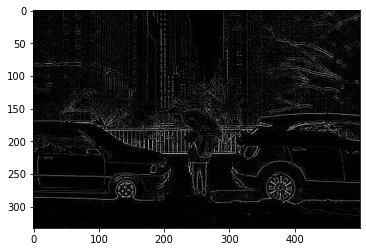

In [ ]:
# so here we have our edges
plt.imshow(filtered_image, cmap = "gray")

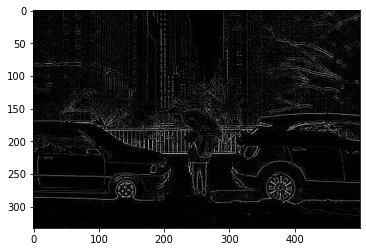

In [ ]:
# alternative way to code it
filtered_image = cv2.Laplacian(gray_image, -1)
plt.imshow(filtered_image, cmap = "gray")

In [ ]:
cv2.waitKey(0)
cv2.destroyAllWindows()

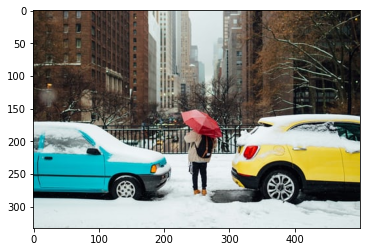

In [ ]:
plt.imshow(image)

In [ ]:
# sharpen kernel
kernel = np.array([[0,-1,0], [-1,9,-1], [0,-1,0]])

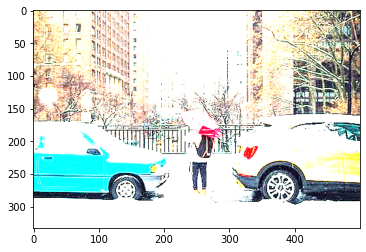

In [ ]:
sharpen_image = cv2.filter2D(image, -1, kernel)
plt.imshow(sharpen_image)